# Feed Forward Network

### Imports

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device_str = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device_str}')
device = torch.device(device_str)

Using cpu


### Hyperparams

In [2]:
input_size = 28*28 # 784, pixel grid
hidden_size = 100
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001
print(f'{input_size=}, {hidden_size=}, {num_classes=}, {num_epochs=}, {batch_size=}, {learning_rate=}')

input_size=784, hidden_size=100, num_classes=10, num_epochs=10, batch_size=100, learning_rate=0.001


### Load data

torch.Size([100, 1, 28, 28]) torch.Size([100])


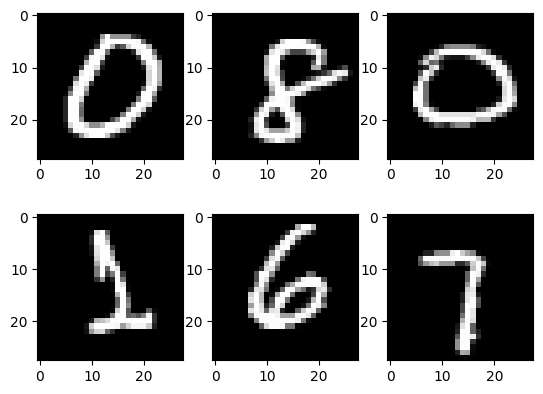

In [3]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

example_sample, example_label = iter(train_loader).next()
print(example_sample.shape, example_label.shape)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(example_sample[i][0], cmap='gray')
plt.show()

### Build Network

In [4]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = torch.relu(self.layer1(x))
        out = self.layer2(out)
        # softmax applied by cross entropy loss
        return out
model = NeuralNet(input_size, hidden_size, num_classes)

### Loss and Optimizer

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Training Loop

In [6]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # images is 100x1x28x28
        # want 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 300 == 0:
            print(f'epoch {epoch + 1}/{num_epochs}, step {i + 1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1/10, step 300/600, loss = 0.1813
epoch 1/10, step 600/600, loss = 0.1960
epoch 2/10, step 300/600, loss = 0.2011
epoch 2/10, step 600/600, loss = 0.2451
epoch 3/10, step 300/600, loss = 0.0591
epoch 3/10, step 600/600, loss = 0.0911
epoch 4/10, step 300/600, loss = 0.0565
epoch 4/10, step 600/600, loss = 0.0694
epoch 5/10, step 300/600, loss = 0.1245
epoch 5/10, step 600/600, loss = 0.1131
epoch 6/10, step 300/600, loss = 0.0429
epoch 6/10, step 600/600, loss = 0.0369
epoch 7/10, step 300/600, loss = 0.0711
epoch 7/10, step 600/600, loss = 0.0961
epoch 8/10, step 300/600, loss = 0.0645
epoch 8/10, step 600/600, loss = 0.1956
epoch 9/10, step 300/600, loss = 0.0157
epoch 9/10, step 600/600, loss = 0.0570
epoch 10/10, step 300/600, loss = 0.0435
epoch 10/10, step 600/600, loss = 0.0212


In [7]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    acc = n_correct / n_samples
    print(f'accuracy = {acc:.4%}')

accuracy = 97.6800%
